<a href="https://colab.research.google.com/github/Englishson0909/S24Corpus-final/blob/main/RQ02(0625).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 RQ2 What are the different distributional patterns of "very" as an adverb, adjective in written and spoken text?

In [1]:
pip install pandas requests

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


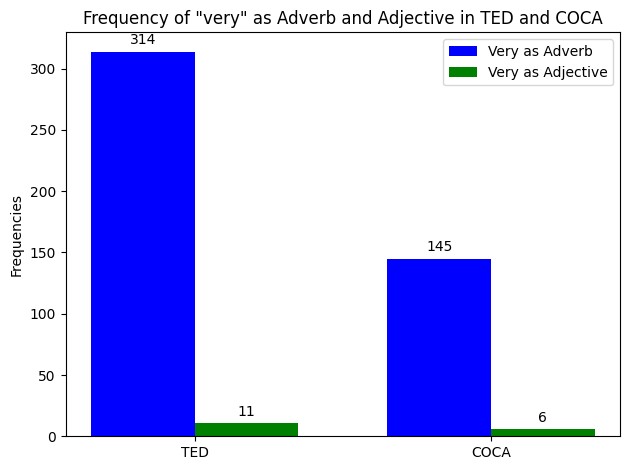

In [ ]:
import requests
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk import pos_tag, word_tokenize

nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

def download_csv(url):
    """Download a CSV file from a given URL and return it as a pandas DataFrame, with text converted to lowercase."""
    response = requests.get(url)
    if response.status_code == 200:
        csv_raw = StringIO(response.text)
        df = pd.read_csv(csv_raw)
        df = df.applymap(lambda s: s.lower() if type(s) is str else s)  # Convert all text to lowercase
        return df
    else:
        raise Exception(f"Failed to download CSV. Status code: {response.status_code}")

def count_pattern(df, word, first_tag, second_tag):
    """Count occurrences of a specified word followed by a word with a specific tag in a DataFrame."""
    total_count = 0
    for text in df.fillna('').astype(str).apply(lambda x: ' '.join(x), axis=1):
        tokens = word_tokenize(text)
        tagged = pos_tag(tokens)
        for i in range(len(tagged) - 1):  # Ensure we do not go out of index
            if tagged[i][0] == word and tagged[i + 1][1] == second_tag:
                total_count += 1
    return total_count

# URLs of the CSV files
ted_csv_url = 'https://github.com/Englishson0909/S24Corpus-final/raw/main/TEDcleandata.csv'
coca_csv_url = 'https://github.com/Englishson0909/S24Corpus-final/raw/main/finalcocatext.csv'

try:
    df_ted = download_csv(ted_csv_url)
    df_coca = download_csv(coca_csv_url)

    # Count "very" as adverb followed by an adjective
    very_as_adverb_ted = count_pattern(df_ted, 'very', 'RB', 'JJ')
    very_as_adverb_coca = count_pattern(df_coca, 'very', 'RB', 'JJ')

    # Count "very" as adjective followed by a noun
    very_as_adjective_ted = count_pattern(df_ted, 'very', 'JJ', 'NN')
    very_as_adjective_coca = count_pattern(df_coca, 'very', 'JJ', 'NN')

    # Data for plotting
    labels = ['TED', 'COCA']
    adverb_counts = [very_as_adverb_ted, very_as_adverb_coca]
    adjective_counts = [very_as_adjective_ted, very_as_adjective_coca]

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, adverb_counts, width, label='Very as Adverb', color='blue')
    rects2 = ax.bar(x + width/2, adjective_counts, width, label='Very as Adjective', color='green')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Frequencies')
    ax.set_title('Frequency of "very" as Adverb and Adjective in TED and COCA')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

    fig.tight_layout()
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Chi-Squared Test Results for 'Very' as Adverb:
Chi-square statistic: 61.46725258649327, P-value: 4.501684315986005e-15, Degrees of freedom: 1
Expected frequencies:
[[   229.55957944 219391.44042056]
 [   229.44042056 219277.55957944]]

Chi-Squared Test Results for 'Very' as Adjective:
Chi-square statistic: 0.9391371932938113, P-value: 0.33249983227717506, Degrees of freedom: 1
Expected frequencies:
[[8.50220665e+00 2.19612498e+05]
 [8.49779335e+00 2.19498502e+05]]


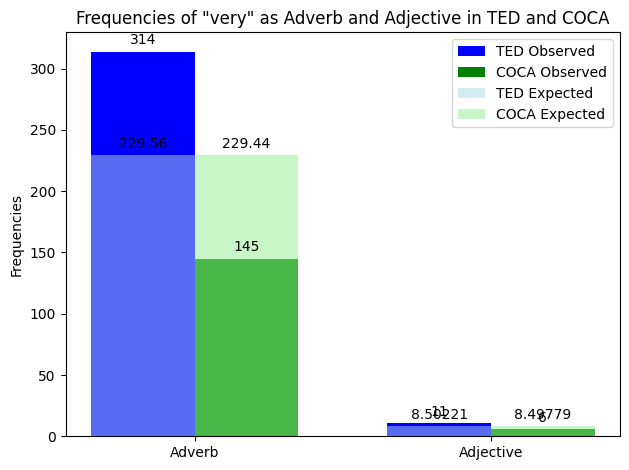

In [ ]:
import requests
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk import pos_tag, word_tokenize
from scipy.stats import chi2_contingency

nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

def download_csv(url):
    """Download a CSV file from a given URL and return it as a pandas DataFrame, with text converted to lowercase."""
    response = requests.get(url)
    if response.status_code == 200:
        csv_raw = StringIO(response.text)
        df = pd.read_csv(csv_raw)
        df = df.applymap(lambda s: s.lower() if type(s) is str else s)
        return df
    else:
        raise Exception(f"Failed to download CSV. Status code: {response.status_code}")

def count_pattern(df, word, first_tag, second_tag):
    """Count occurrences of a specified word followed by a word with a specific tag in a DataFrame."""
    total_count = 0
    for text in df.fillna('').astype(str).apply(lambda x: ' '.join(x), axis=1):
        tokens = word_tokenize(text)
        tagged = pos_tag(tokens)
        for i in range(len(tagged) - 1):
            if tagged[i][0] == word and tagged[i + 1][1] == second_tag:
                total_count += 1
    return total_count

# URLs of the CSV files
ted_csv_url = 'https://github.com/Englishson0909/S24Corpus-final/raw/main/TEDcleandata.csv'
coca_csv_url = 'https://github.com/Englishson0909/S24Corpus-final/raw/main/finalcocatext.csv'

try:
    df_ted = download_csv(ted_csv_url)
    df_coca = download_csv(coca_csv_url)

    # Count "very" as adverb and as adjective
    very_as_adverb_ted = count_pattern(df_ted, 'very', 'RB', 'JJ')
    very_as_adverb_coca = count_pattern(df_coca, 'very', 'RB', 'JJ')
    very_as_adjective_ted = count_pattern(df_ted, 'very', 'JJ', 'NN')
    very_as_adjective_coca = count_pattern(df_coca, 'very', 'JJ', 'NN')

    # Prepare contingency table for chi-squared tests
    total_words_ted = sum([len(word_tokenize(text)) for text in df_ted.fillna('').astype(str).apply(lambda x: ' '.join(x), axis=1)])
    total_words_coca = sum([len(word_tokenize(text)) for text in df_coca.fillna('').astype(str).apply(lambda x: ' '.join(x), axis=1)])

    contingency_adverb = [[very_as_adverb_ted, total_words_ted - very_as_adverb_ted],
                          [very_as_adverb_coca, total_words_coca - very_as_adverb_coca]]
    contingency_adjective = [[very_as_adjective_ted, total_words_ted - very_as_adjective_ted],
                             [very_as_adjective_coca, total_words_coca - very_as_adjective_coca]]

    # Perform chi-squared test for adverb
    chi2_adverb, p_adverb, dof_adverb, expected_adverb = chi2_contingency(contingency_adverb)

    # Perform chi-squared test for adjective
    chi2_adjective, p_adjective, dof_adjective, expected_adjective = chi2_contingency(contingency_adjective)

    # Print combined results
    print("Chi-Squared Test Results for 'Very' as Adverb:")
    print(f"Chi-square statistic: {chi2_adverb}, P-value: {p_adverb}, Degrees of freedom: {dof_adverb}")
    print("Expected frequencies:")
    print(expected_adverb)

    print("\nChi-Squared Test Results for 'Very' as Adjective:")
    print(f"Chi-square statistic: {chi2_adjective}, P-value: {p_adjective}, Degrees of freedom: {dof_adjective}")
    print("Expected frequencies:")
    print(expected_adjective)

    # Data for plotting
    labels = ['Adverb', 'Adjective']
    ted_counts = [very_as_adverb_ted, very_as_adjective_ted]
    coca_counts = [very_as_adverb_coca, very_as_adjective_coca]
    expected_ted = [expected_adverb[0][0], expected_adjective[0][0]]
    expected_coca = [expected_adverb[1][0], expected_adjective[1][0]]

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, ted_counts, width, label='TED Observed', color='blue')
    rects2 = ax.bar(x + width/2, coca_counts, width, label='COCA Observed', color='green')
    rects3 = ax.bar(x - width/2, expected_ted, width, label='TED Expected', color='lightblue', alpha=0.5)
    rects4 = ax.bar(x + width/2, expected_coca, width, label='COCA Expected', color='lightgreen', alpha=0.5)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Frequencies')
    ax.set_title('Frequencies of "very" as Adverb and Adjective in TED and COCA')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)
    ax.bar_label(rects3, padding=3)
    ax.bar_label(rects4, padding=3)

    fig.tight_layout()
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Chi-Squared Test Results for 'Very' as Adverb:
Chi-square statistic: 61.46725258649327, P-value: 4.501684315986005e-15, Degrees of freedom: 1
Expected frequencies:
[[   229.55957944 219391.44042056]
 [   229.44042056 219277.55957944]]

Chi-Squared Test Results for 'Very' as Adjective:
Chi-square statistic: 0.9391371932938113, P-value: 0.33249983227717506, Degrees of freedom: 1
Expected frequencies:
[[8.50220665e+00 2.19612498e+05]
 [8.49779335e+00 2.19498502e+05]]


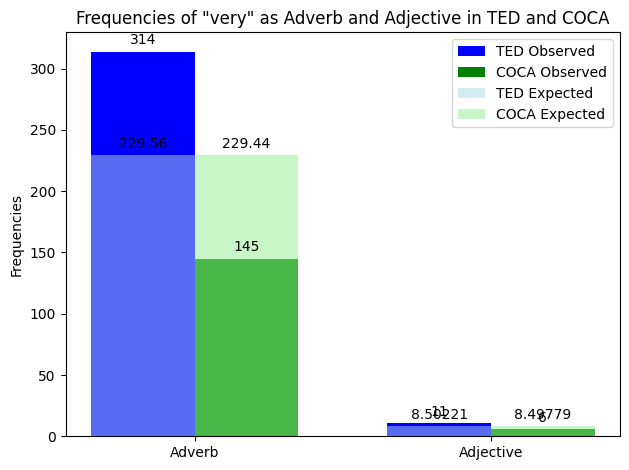

In [ ]:
import requests
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk import pos_tag, word_tokenize
from scipy.stats import chi2_contingency

nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

def download_csv(url):
    """Download a CSV file from a given URL and return it as a pandas DataFrame, with text converted to lowercase."""
    response = requests.get(url)
    if response.status_code == 200:
        csv_raw = StringIO(response.text)
        df = pd.read_csv(csv_raw)
        df = df.applymap(lambda s: s.lower() if type(s) is str else s)
        return df
    else:
        raise Exception(f"Failed to download CSV. Status code: {response.status_code}")

def count_pattern(df, word, first_tag, second_tag):
    """Count occurrences of a specified word followed by a word with a specific tag in a DataFrame."""
    total_count = 0
    for text in df.fillna('').astype(str).apply(lambda x: ' '.join(x), axis=1):
        tokens = word_tokenize(text)
        tagged = pos_tag(tokens)
        for i in range(len(tagged) - 1):
            if tagged[i][0] == word and tagged[i + 1][1] == second_tag:
                total_count += 1
    return total_count

# URLs of the CSV files
ted_csv_url = 'https://github.com/Englishson0909/S24Corpus-final/raw/main/TEDcleandata.csv'
coca_csv_url = 'https://github.com/Englishson0909/S24Corpus-final/raw/main/finalcocatext.csv'

try:
    df_ted = download_csv(ted_csv_url)
    df_coca = download_csv(coca_csv_url)

    # Count "very" as adverb and as adjective
    very_as_adverb_ted = count_pattern(df_ted, 'very', 'RB', 'JJ')
    very_as_adverb_coca = count_pattern(df_coca, 'very', 'RB', 'JJ')
    very_as_adjective_ted = count_pattern(df_ted, 'very', 'JJ', 'NN')
    very_as_adjective_coca = count_pattern(df_coca, 'very', 'JJ', 'NN')

    # Prepare contingency table for chi-squared tests
    total_words_ted = sum([len(word_tokenize(text)) for text in df_ted.fillna('').astype(str).apply(lambda x: ' '.join(x), axis=1)])
    total_words_coca = sum([len(word_tokenize(text)) for text in df_coca.fillna('').astype(str).apply(lambda x: ' '.join(x), axis=1)])

    contingency_adverb = [[very_as_adverb_ted, total_words_ted - very_as_adverb_ted],
                          [very_as_adverb_coca, total_words_coca - very_as_adverb_coca]]
    contingency_adjective = [[very_as_adjective_ted, total_words_ted - very_as_adjective_ted],
                             [very_as_adjective_coca, total_words_coca - very_as_adjective_coca]]

    # Perform chi-squared test for adverb
    chi2_adverb, p_adverb, dof_adverb, expected_adverb = chi2_contingency(contingency_adverb)

    # Perform chi-squared test for adjective
    chi2_adjective, p_adjective, dof_adjective, expected_adjective = chi2_contingency(contingency_adjective)

    # Print combined results
    print("Chi-Squared Test Results for 'Very' as Adverb:")
    print(f"Chi-square statistic: {chi2_adverb}, P-value: {p_adverb}, Degrees of freedom: {dof_adverb}")
    print("Expected frequencies:")
    print(expected_adverb)

    print("\nChi-Squared Test Results for 'Very' as Adjective:")
    print(f"Chi-square statistic: {chi2_adjective}, P-value: {p_adjective}, Degrees of freedom: {dof_adjective}")
    print("Expected frequencies:")
    print(expected_adjective)

    # Data for plotting
    labels = ['Adverb', 'Adjective']
    ted_counts = [very_as_adverb_ted, very_as_adjective_ted]
    coca_counts = [very_as_adverb_coca, very_as_adjective_coca]
    expected_ted = [expected_adverb[0][0], expected_adjective[0][0]]
    expected_coca = [expected_adverb[1][0], expected_adjective[1][0]]

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, ted_counts, width, label='TED Observed', color='blue')
    rects2 = ax.bar(x + width/2, coca_counts, width, label='COCA Observed', color='green')
    rects3 = ax.bar(x - width/2, expected_ted, width, label='TED Expected', color='lightblue', alpha=0.5)
    rects4 = ax.bar(x + width/2, expected_coca, width, label='COCA Expected', color='lightgreen', alpha=0.5)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Frequencies')
    ax.set_title('Frequencies of "very" as Adverb and Adjective in TED and COCA')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)
    ax.bar_label(rects3, padding=3)
    ax.bar_label(rects4, padding=3)

    fig.tight_layout()
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")
